In [2]:
!pip install pandas

In [3]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from mplsoccer.pitch import Pitch

In [4]:
df = pd.read_csv('xG_shots.csv')

In [5]:
df

,period,minute,second,type,outcome_type,team_id,team,player_id,player,x,y,xG,goal (y/n)
0,FirstHalf,0,25,SavedShot,Successful,15,Chelsea,361330,Reece James,85.9,28.8,0.03,n
1,FirstHalf,11,37,SavedShot,Successful,15,Chelsea,395692,Cole Palmer,87.6,31.4,0.04,n
2,FirstHalf,15,35,SavedShot,Successful,167,Man City,365409,Juli?n ?lvarez,93.8,29.8,0.04,n
3,FirstHalf,16,6,SavedShot,Successful,167,Man City,402664,Josko Gvardiol,86.7,57.8,0.01,n
4,FirstHalf,18,14,SavedShot,Successful,15,Chelsea,375621,Conor Gallagher,77.7,44.2,0.05,n
5,FirstHalf,24,3,Goal,Successful,167,Man City,315227,Erling Haaland,88.5,50.0,0.79,y
6,FirstHalf,26,26,SavedShot,Successful,15,Chelsea,410175,Mois?s Caicedo,77.8,53.3,0.03,n
7,FirstHalf,27,50,SavedShot,Successful,15,Chelsea,361330,Reece James,77.5,64.9,0.06,n
8,FirstHalf,28,24,Goal,Successful,15,Chelsea,28550,Thiago Silva,95.2,39.1,0.07,y
9,FirstHalf,31,40,MissedShot,Successful,167,Man City,315227,Erling Haaland,99.2,58.4,0.07,n


In [7]:
a_xG = [0]
h_xG = [0]
a_min = [0]
h_min = [0]

# Find home and away teams
hteam = df['team'].iloc[0]  # first row (Chelsea)
ateam = df['team'].iloc[-1] # last row (ManCity)

for x in range(len(df['xG'])):
    if df['team'][x]==ateam:
        a_xG.append(df['xG'][x])
        a_min.append(df['minute'][x])
    if df['team'][x]==hteam:
        h_xG.append(df['xG'][x])
        h_min.append(df['minute'][x])

In [8]:
a_xG

[0,
 0.04,
 0.01,
 0.79,
 0.07,
 0.07,
 0.31,
 0.02,
 0.29,
 0.87,
 0.12,
 0.09,
 0.07,
 0.03,
 0.03,
 0.07]

In [46]:
def nums_cumulative_sum(nums_list):
    return [sum(nums_list[:i+1]) for i in range(len(nums_list))]
a_cumulative = nums_cumulative_sum(a_xG)
h_cumulative = nums_cumulative_sum(h_xG)

In [47]:
a_cumulative

[0,
 0.04,
 0.05,
 0.8400000000000001,
 0.9100000000000001,
 0.9800000000000002,
 1.2900000000000003,
 1.3100000000000003,
 1.6000000000000003,
 2.47,
 2.5900000000000003,
 2.68,
 2.75,
 2.78,
 2.8099999999999996,
 2.8799999999999994]

In [65]:
h_cumulative

[0,
 0.03,
 0.07,
 0.12000000000000001,
 0.15000000000000002,
 0.21000000000000002,
 0.28,
 0.71,
 0.75,
 0.77,
 0.86,
 0.9,
 1.38,
 1.41,
 1.96,
 2.16,
 2.18,
 2.97]

In [48]:
a_total = round(a_cumulative [-1], 2)
h_total = round(h_cumulative [-1], 2)

In [49]:
#Cumulative Sum xG home team
h_df = df[df['team'] == hteam]
h_df.sort_values(by='minute', inplace=True)
h_df['h_cum'] = h_df['xG'].cumsum()

#Cumulative Sum xG away team
a_df = df[df['team'] == ateam]
a_df.sort_values(by='minute', inplace=True)
a_df['a_cum'] = a_df['xG'].cumsum()

C:\Users\User\AppData\Local\Temp\ipykernel_9224\3223565806.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  h_df.sort_values(by='minute', inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_9224\3223565806.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  h_df['h_cum'] = h_df['xG'].cumsum()
C:\Users\User\AppData\Local\Temp\ipykernel_9224\3223565806.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#re

In [50]:
h_df

,period,minute,second,type,outcome_type,team_id,team,player_id,player,x,y,xG,goal (y/n),h_cum
0,FirstHalf,0,25,SavedShot,Successful,15,Chelsea,361330,Reece James,85.9,28.8,0.03,n,0.03
1,FirstHalf,11,37,SavedShot,Successful,15,Chelsea,395692,Cole Palmer,87.6,31.4,0.04,n,0.07
4,FirstHalf,18,14,SavedShot,Successful,15,Chelsea,375621,Conor Gallagher,77.7,44.2,0.05,n,0.12
6,FirstHalf,26,26,SavedShot,Successful,15,Chelsea,410175,Mois?s Caicedo,77.8,53.3,0.03,n,0.15
7,FirstHalf,27,50,SavedShot,Successful,15,Chelsea,361330,Reece James,77.5,64.9,0.06,n,0.21
8,FirstHalf,28,24,Goal,Successful,15,Chelsea,28550,Thiago Silva,95.2,39.1,0.07,y,0.28
11,FirstHalf,36,23,Goal,Successful,15,Chelsea,97692,Raheem Sterling,96.7,50.9,0.43,y,0.71
12,FirstHalf,39,48,SavedShot,Successful,15,Chelsea,369430,Enzo Fern?ndez,78.5,63.2,0.04,n,0.75
13,FirstHalf,40,41,MissedShot,Successful,15,Chelsea,97692,Raheem Sterling,88.3,69.3,0.02,n,0.77
16,FirstHalf,43,14,SavedShot,Successful,15,Chelsea,426050,Nicolas Jackson,84.7,52.8,0.09,n,0.86


In [51]:
h_goal = h_df[h_df['type'].str.contains("Goal")]
h_goal["scorechart"] = h_goal["minute"].astype(str) + "'" + " " +h_goal["player"]
a_goal = a_df[a_df['type'].str.contains("Goal")]
a_goal["scorechart"] = a_goal["minute"].astype(str) + "'" + " " +a_goal["player"]

C:\Users\User\AppData\Local\Temp\ipykernel_9224\1230918128.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  h_goal["scorechart"] = h_goal["minute"].astype(str) + "'" + " " +h_goal["player"]
C:\Users\User\AppData\Local\Temp\ipykernel_9224\1230918128.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a_goal["scorechart"] = a_goal["minute"].astype(str) + "'" + " " +a_goal["player"]


In [52]:
h_goal

,period,minute,second,type,outcome_type,team_id,team,player_id,player,x,y,xG,goal (y/n),h_cum,scorechart
8,FirstHalf,28,24,Goal,Successful,15,Chelsea,28550,Thiago Silva,95.2,39.1,0.07,y,0.28,28' Thiago Silva
11,FirstHalf,36,23,Goal,Successful,15,Chelsea,97692,Raheem Sterling,96.7,50.9,0.43,y,0.71,36' Raheem Sterling
25,SecondHalf,66,25,Goal,Successful,15,Chelsea,426050,Nicolas Jackson,90.5,47.6,0.55,y,1.96,66' Nicolas Jackson
30,SecondHalf,94,24,Goal,Successful,15,Chelsea,395692,Cole Palmer,88.5,50.0,0.79,y,2.97,94' Cole Palmer


Text(0.75, 0.98, 'Chelsea')

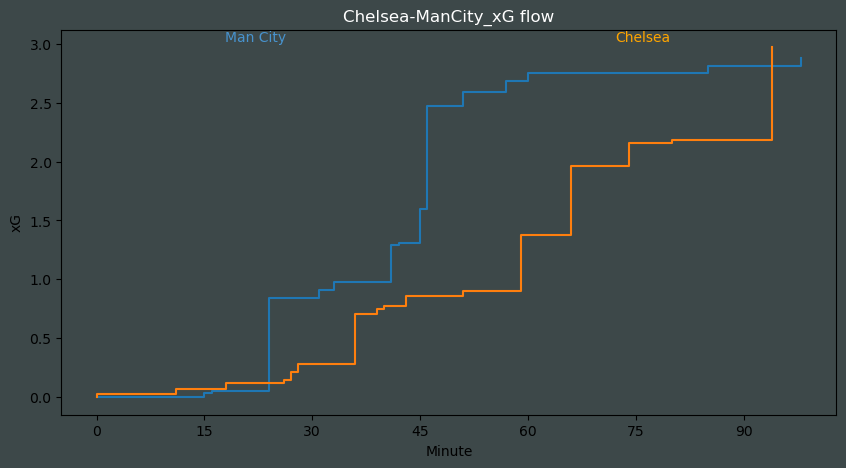

In [61]:
fig, ax = plt.subplots(figsize = (10,5))
fig.set_facecolor('#3d4849')
ax.patch.set_facecolor('#3d4849')

plt.xticks([0,15,30,45,60,75,90])
plt.xlabel('Minute')
plt.ylabel('xG')

ax.step(x=a_min, y=a_cumulative, where='post')
ax.step(x=h_min, y=h_cumulative, where='post')


title_text = 'Chelsea-ManCity_xG flow'
ax.set_title(title_text, color='white')

ax.text(0.25, 0.98, 'Man City', color=(72/255, 147/255, 206/255), fontsize=10, ha='center', va='center', transform=ax.transAxes)
ax.text(0.75, 0.98, 'Chelsea', color='orange', fontsize=10, ha='center', va='center', transform=ax.transAxes)

C:\Users\User\AppData\Local\Temp\ipykernel_9224\3745521333.py:13: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for j, txt in h_goal['scorechart'].iteritems():
C:\Users\User\AppData\Local\Temp\ipykernel_9224\3745521333.py:17: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for i, txt in a_goal['scorechart'].iteritems():
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


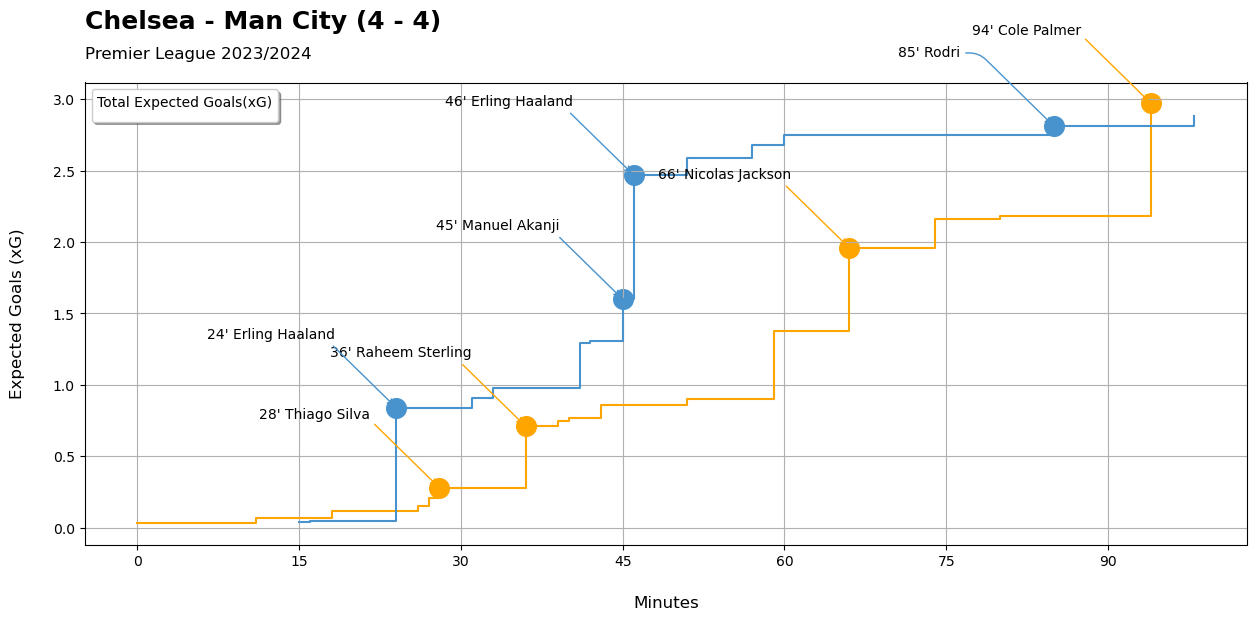

In [64]:
fig, ax = plt.subplots(figsize=(15,6))

# Create line plots
ax.step(x = h_df['minute'], y = h_df['h_cum'], where = 'post', color='orange')  
ax.step(x = a_df['minute'], y = a_df['a_cum'], where = 'post', color=(72/255, 147/255, 206/255))

# Create scatter plot for highlighting the goal
ax.scatter(x= h_goal['minute'], y = h_goal['h_cum'] , marker= ball, s= 200, color='orange')
ax.scatter(x= a_goal['minute'], y = a_goal['a_cum'] , marker= ball, s =200, color=(72/255, 147/255, 206/255))


# Customize our chart
for j, txt in h_goal['scorechart'].iteritems():
    ax.annotate(txt, (h_goal['minute'][j], h_goal['h_cum'][j]),xycoords='data',ha='center',
                xytext=(-90, 50), textcoords='offset points', arrowprops=dict(arrowstyle="->",connectionstyle="arc,angleA=0,armA=50,rad=10", color='orange'))

for i, txt in a_goal['scorechart'].iteritems():
    ax.annotate(txt, (a_goal['minute'][i], a_goal['a_cum'][i]),xycoords='data', ha='center',
                xytext=(-90, 50), textcoords='offset points', arrowprops=dict(arrowstyle="->",connectionstyle="arc,angleA=0,armA=50,rad=10", color=(72/255, 147/255, 206/255)))


plt.xticks([0,15,30,45,60,75,90])
plt.yticks([0, 0.5, 1, 1.5, 2, 2.5, 3])
plt.grid()

fig.text(s=hteam + " - " + ateam + " (" + '4' + " - " + '4' + ")", x=0.125, y=0.97, fontsize=18,fontweight="bold")
fig.text(s='Premier League 2023/2024', x=0.125, y=0.92, fontsize=12)
legend = ax.legend(title = 'Total Expected Goals(xG)' ,loc='best', shadow=True)
legend._legend_box.align = "left"

plt.ylabel("Expected Goals (xG)", fontsize = 12, labelpad = 20)
plt.xlabel("Minutes", fontsize = 12, labelpad = 20)
plt.show()